In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
dataset = 'https://www.kaggle.com/datasets/emmarex/plantdisease'

In [4]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: isihack
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease


100%|██████████| 658M/658M [00:03<00:00, 181MB/s] 


In [6]:
import os

print("Contents of ./plantdisease:")
print(os.listdir('./plantdisease'))


Contents of ./plantdisease:
['plantvillage', 'extracted', 'PlantVillage']


In [9]:
import os

paths_to_check = [
    './plantdisease/plantvillage',
    './plantdisease/PlantVillage',
    './plantdisease/extracted'
]

for path in paths_to_check:
    print(f"\n Checking: {path}")
    try:
        print(" Subfolders:", os.listdir(path))
    except Exception as e:
        print(" Error:", e)



 Checking: ./plantdisease/plantvillage
 Subfolders: ['PlantVillage']

 Checking: ./plantdisease/PlantVillage
 Subfolders: ['Pepper__bell___healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Target_Spot', 'Pepper__bell___Bacterial_spot', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_Late_blight', 'Potato___Late_blight', 'Potato___Early_blight', 'Tomato_Early_blight', 'Tomato__Tomato_mosaic_virus', 'Potato___healthy', 'Tomato_healthy']

 Checking: ./plantdisease/extracted
 Subfolders: []


In [10]:
import os
import shutil
import random
from pathlib import Path

# Paths
src_dir = Path('./plantdisease/PlantVillage')
dst_dir = Path('./plantdisease_subset')
dst_dir.mkdir(parents=True, exist_ok=True)

# Pick 5 random class folders
selected_classes = random.sample(os.listdir(src_dir), 5)

print("Selected classes:", selected_classes)

# Copy ≤100 images per class into new folder
for cls in selected_classes:
    src_class_dir = src_dir / cls
    dst_class_dir = dst_dir / cls
    dst_class_dir.mkdir(parents=True, exist_ok=True)

    images = [f for f in os.listdir(src_class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for img in random.sample(images, min(100, len(images))):
        shutil.copy(src_class_dir / img, dst_class_dir / img)

print("Dataset subset created at:", dst_dir)


Selected classes: ['Tomato_Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Septoria_leaf_spot']
Dataset subset created at: plantdisease_subset


In [11]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
data_dir = './plantdisease_subset'  # Directory containing selected subset
image_size = (224, 224)             # Standard input size for most CNNs
batch_size = 32

## Load Dataset using `image_dataset_from_directory`

In [14]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)

class_names = train_ds.class_names
print(f'Loaded classes: {class_names}')

Found 985 files belonging to 8 classes.
Using 788 files for training.
Found 985 files belonging to 8 classes.
Using 197 files for validation.
Loaded classes: ['Potato___Late_blight', 'Tomato_Bacterial_spot', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus']


##  Visualize Sample Images from the Training Dataset

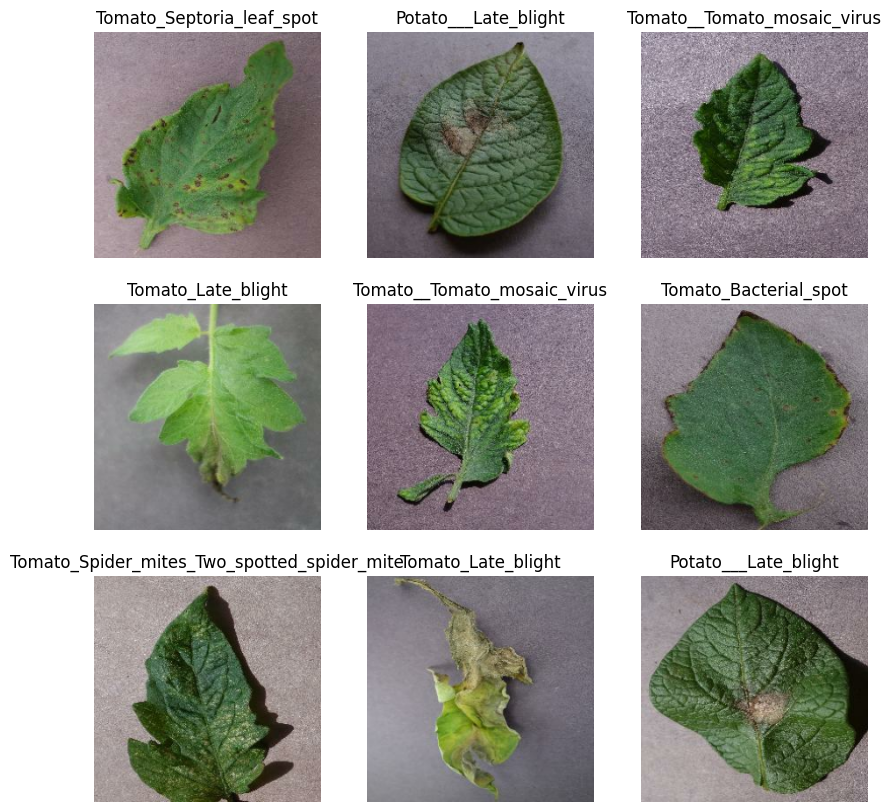

In [15]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## Define Data Augmentation Layers

In [16]:
from keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

## Visualize Augmented Images

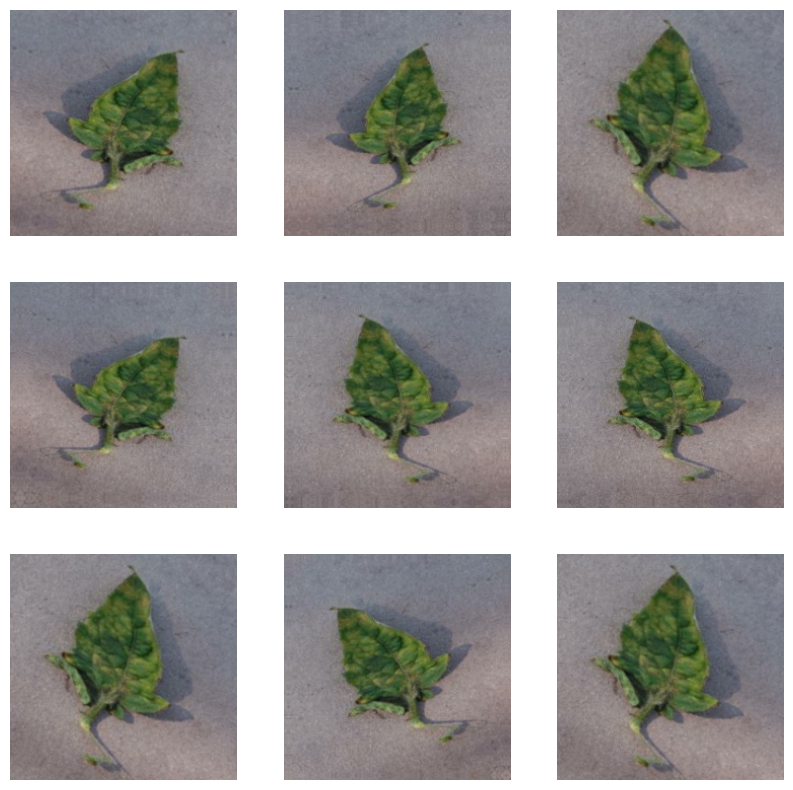

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented[0].numpy().astype("uint8"))
        plt.axis("off")

##  Optimize Pipeline with Prefetching

In [19]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
print('Data pipeline with prefetching is ready.')

Data pipeline with prefetching is ready.
